In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import confusion_matrix

In [55]:
# Fetch data
data = fetch_20newsgroups()
categories = ['talk.religion.misc', 'sci.space', 'rec.motorcycles']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

# Define vocabulary
vocab = ['Religion', 'God', 'Beliefs', 'Religious', 'Believers', 'Christ', 'Church', 'Orthodox', 'Muslim', 'Bible', 'Truth', 'Morals', 'Scripture', 'Commandments', 'Christian', 'Politics', 'Culture', 'Sin', 'Interpret', 'Mormon', 'prayer'] \
        + ['star', 'sun', 'sonic', 'titan', 'jupyter', 'planets', 'astronomy', 'astronomer', 'moon', 'nasa', 'earth', 'astronomical', 'space', 'spacecraft', 'planetary', 'universe', 'supersonic', 'satellite', 'orbit'] \
        + ['speed', 'bike', 'BMW', 'BMWRA', 'helmet', 'manufacturer', 'fiberglass', 'low-speed']

vocab = [v.lower() for v in vocab]


In [57]:
# Collect data for each category
# 문서에 대하여 0,1,2 각각에 해당하는 데이터 넣기

data_category = {category: [] for category in categories}
for i in range(len(train.data)):
    category = train.target_names[train.target[i]]
    if category in categories:
        data_category[category].append(train.data[i])

In [85]:
data_category.items()

dict_items([('talk.religion.misc', ['From: kevin@rotag.mi.org (Kevin Darcy)\nSubject: Re: After 2000 years, can we say that Christian Morality is\nOrganization: Who, me???\nLines: 41\n\nIn article <1qme79$c0k@kyle.eitech.com> ekr@kyle.eitech.com (Eric Rescorla) writes:\n>In article <1qm36b$gn2@horus.ap.mchp.sni.de> frank@D012S658.uucp (Frank O\'Dwyer) writes:\n>>In article <1qktj3$bn9@squick.eitech.com> ekr@squick.eitech.com (Eric Rescorla) writes:\n>>#In article <1qkn1t$59l@horus.ap.mchp.sni.de> frank@D012S658.uucp (Frank O\'Dwyer) writes:\n>\n>>#Like I said before, DES works whether I value my privacy or\n>>#not.\n>>\n>>O.K., which DES?  The abstract function DES? that stops working in any \n>>important sense if no-one cares for the importance of truth, mathematics, \n>>meaning, information, etc.  A DES chip or DES s/w?  That stops working in any \n>>important sense if no-one values science, objective reality, etc.   DES\n>>does not work in a value vacuum.  Nothing else does, either.

In [65]:
type(data_category["sci.space"])

list

In [62]:
len(data_category['sci.space'])

593

In [69]:
vocabcount_category = {category: {v: 0 for v in vocab} for category in categories}
#각 카테고리에 대하여 보카에 해당하는 단어가 몇 개 있는지 세기 를 위한 초기화

In [71]:
vocabcount_category

{'talk.religion.misc': {'religion': 0,
  'god': 0,
  'beliefs': 0,
  'religious': 0,
  'believers': 0,
  'christ': 0,
  'church': 0,
  'orthodox': 0,
  'muslim': 0,
  'bible': 0,
  'truth': 0,
  'morals': 0,
  'scripture': 0,
  'commandments': 0,
  'christian': 0,
  'politics': 0,
  'culture': 0,
  'sin': 0,
  'interpret': 0,
  'mormon': 0,
  'prayer': 0,
  'star': 0,
  'sun': 0,
  'sonic': 0,
  'titan': 0,
  'jupyter': 0,
  'planets': 0,
  'astronomy': 0,
  'astronomer': 0,
  'moon': 0,
  'nasa': 0,
  'earth': 0,
  'astronomical': 0,
  'space': 0,
  'spacecraft': 0,
  'planetary': 0,
  'universe': 0,
  'supersonic': 0,
  'satellite': 0,
  'orbit': 0,
  'speed': 0,
  'bike': 0,
  'bmw': 0,
  'bmwra': 0,
  'helmet': 0,
  'manufacturer': 0,
  'fiberglass': 0,
  'low-speed': 0},
 'sci.space': {'religion': 0,
  'god': 0,
  'beliefs': 0,
  'religious': 0,
  'believers': 0,
  'christ': 0,
  'church': 0,
  'orthodox': 0,
  'muslim': 0,
  'bible': 0,
  'truth': 0,
  'morals': 0,
  'scripture':

In [74]:
type(vocabcount_category)

dict

In [80]:
vocabcount_category["sci.space"]

{'religion': 0,
 'god': 0,
 'beliefs': 0,
 'religious': 0,
 'believers': 0,
 'christ': 0,
 'church': 0,
 'orthodox': 0,
 'muslim': 0,
 'bible': 0,
 'truth': 0,
 'morals': 0,
 'scripture': 0,
 'commandments': 0,
 'christian': 0,
 'politics': 0,
 'culture': 0,
 'sin': 0,
 'interpret': 0,
 'mormon': 0,
 'prayer': 0,
 'star': 0,
 'sun': 0,
 'sonic': 0,
 'titan': 0,
 'jupyter': 0,
 'planets': 0,
 'astronomy': 0,
 'astronomer': 0,
 'moon': 0,
 'nasa': 0,
 'earth': 0,
 'astronomical': 0,
 'space': 0,
 'spacecraft': 0,
 'planetary': 0,
 'universe': 0,
 'supersonic': 0,
 'satellite': 0,
 'orbit': 0,
 'speed': 0,
 'bike': 0,
 'bmw': 0,
 'bmwra': 0,
 'helmet': 0,
 'manufacturer': 0,
 'fiberglass': 0,
 'low-speed': 0}

In [81]:
# for category, data in data_category.items():
#     total_words = 0
#     for dstr in data:
#         words = dstr.lower().split()
#         for w in words:
#             if w in vocab:
#                 total_words += 1
#                 vocabcount_category[category][w] += 1
#     print(f"total {category} words in vocab = {total_words}")

total talk.religion.misc words in vocab = 1097
total sci.space words in vocab = 2676
total rec.motorcycles words in vocab = 744


In [86]:
# vocabcount_category

{'talk.religion.misc': {'religion': 46,
  'god': 239,
  'beliefs': 33,
  'religious': 54,
  'believers': 5,
  'christ': 68,
  'church': 60,
  'orthodox': 6,
  'muslim': 4,
  'bible': 136,
  'truth': 46,
  'morals': 6,
  'scripture': 14,
  'commandments': 23,
  'christian': 194,
  'politics': 2,
  'culture': 2,
  'sin': 33,
  'interpret': 11,
  'mormon': 37,
  'prayer': 3,
  'star': 2,
  'sun': 21,
  'sonic': 0,
  'titan': 0,
  'jupyter': 0,
  'planets': 0,
  'astronomy': 0,
  'astronomer': 0,
  'moon': 4,
  'nasa': 0,
  'earth': 19,
  'astronomical': 0,
  'space': 2,
  'spacecraft': 0,
  'planetary': 11,
  'universe': 12,
  'supersonic': 0,
  'satellite': 0,
  'orbit': 0,
  'speed': 3,
  'bike': 0,
  'bmw': 0,
  'bmwra': 0,
  'helmet': 1,
  'manufacturer': 0,
  'fiberglass': 0,
  'low-speed': 0},
 'sci.space': {'religion': 1,
  'god': 4,
  'beliefs': 0,
  'religious': 0,
  'believers': 0,
  'christ': 2,
  'church': 1,
  'orthodox': 10,
  'muslim': 0,
  'bible': 0,
  'truth': 1,
  'mora

In [96]:
# vocabcount_category["sci.space"]


{'religion': 1,
 'god': 4,
 'beliefs': 0,
 'religious': 0,
 'believers': 0,
 'christ': 2,
 'church': 1,
 'orthodox': 10,
 'muslim': 0,
 'bible': 0,
 'truth': 1,
 'morals': 0,
 'scripture': 0,
 'commandments': 0,
 'christian': 2,
 'politics': 2,
 'culture': 0,
 'sin': 4,
 'interpret': 1,
 'mormon': 0,
 'prayer': 0,
 'star': 52,
 'sun': 39,
 'sonic': 2,
 'titan': 63,
 'jupyter': 0,
 'planets': 25,
 'astronomy': 65,
 'astronomer': 3,
 'moon': 188,
 'nasa': 326,
 'earth': 150,
 'astronomical': 45,
 'space': 1065,
 'spacecraft': 124,
 'planetary': 96,
 'universe': 24,
 'supersonic': 4,
 'satellite': 168,
 'orbit': 181,
 'speed': 28,
 'bike': 0,
 'bmw': 0,
 'bmwra': 0,
 'helmet': 0,
 'manufacturer': 0,
 'fiberglass': 0,
 'low-speed': 0}

In [107]:
for category, data in data_category.items():
    total_words = 0
    for dstr in data:
        words = dstr.lower().split()
        for w in words:
            if w in vocab:
                total_words += 1
                vocabcount_category[category][w] += 1
    print(f"total {category} words in vocab = {total_words}")

    # Convert counts to probabilities
    total = sum(vocabcount_category[category].values())
    for k in vocabcount_category[category]:
        vocabcount_category[category][k] /= total

total talk.religion.misc words in vocab = 1097
total sci.space words in vocab = 2676
total rec.motorcycles words in vocab = 744


In [108]:
vocabcount_category

{'talk.religion.misc': {'religion': 0.041931737736735114,
  'god': 0.2178593870554694,
  'beliefs': 0.030081688818892904,
  'religious': 0.04922407553233031,
  'believers': 0.004558506534309693,
  'christ': 0.061985666674621916,
  'church': 0.05469332887902672,
  'orthodox': 0.005470048758759094,
  'muslim': 0.0036469643098602927,
  'bible': 0.12397053793718116,
  'truth': 0.041931737736735114,
  'morals': 0.005470048758759094,
  'scripture': 0.012762386554354296,
  'commandments': 0.0209662665743989,
  'christian': 0.1768399869552464,
  'politics': 0.001823879860961492,
  'culture': 0.001823879860961492,
  'sin': 0.030081688818892904,
  'interpret': 0.010027759881006095,
  'mormon': 0.03372785771669051,
  'prayer': 0.0027354220854108923,
  'star': 0.001823879860961492,
  'sun': 0.0191431821255001,
  'sonic': 7.954120626911049e-07,
  'titan': 7.954120626911049e-07,
  'jupyter': 7.954120626911049e-07,
  'planets': 7.954120626911049e-07,
  'astronomy': 7.954120626911049e-07,
  'astronome

In [109]:
vocab_logp_category = {category: {key: np.log(value) for key, value in vocabcount.items()} for category, vocabcount in vocabcount_category.items()}


In [110]:
vocab_logp_category

{'talk.religion.misc': {'religion': -3.171712274901137,
  'god': -1.5239054378107755,
  'beliefs': -3.5038386372314174,
  'religious': -3.0113724350836772,
  'believers': -5.390760223506168,
  'christ': -2.780852103331266,
  'church': -2.9060135353276157,
  'orthodox': -5.20846774873805,
  'muslim': -5.613860153367368,
  'bible': -2.087711338888603,
  'truth': -3.171712274901137,
  'morals': -5.20846774873805,
  'scripture': -4.361252984513873,
  'commandments': -3.8648404864280406,
  'christian': -1.7325099837899514,
  'politics': -6.306789255200174,
  'culture': -6.306789255200174,
  'sin': -3.5038386372314174,
  'interpret': -4.602398043826573,
  'mormon': -3.3894311446237713,
  'prayer': -5.901469527625716,
  'star': -6.306789255200174,
  'sun': -3.9558086515254125,
  'sonic': -14.044405538721932,
  'titan': -14.044405538721932,
  'jupyter': -14.044405538721932,
  'planets': -14.044405538721932,
  'astronomy': -14.044405538721932,
  'astronomer': -14.044405538721932,
  'moon': -5.6

In [120]:
d_trained = 0
predicted_label = []

tsample = test.data[0]

In [121]:
logp_category = {category: sum(vocab_logp_category["sci.space"].get(w, 0) 
                               for w in tsample.lower().split() if w in vocab) 
                 for category in categories}

In [122]:
logp_category

{'talk.religion.misc': -7.909856667269403,
 'sci.space': -7.909856667269403,
 'rec.motorcycles': -7.909856667269403}

In [124]:
predicted_label = max(logp_category, key=logp_category.get)

In [125]:
predicted_label

'talk.religion.misc'

In [129]:
true_label = test.target_names[test.target[0]]

In [132]:
true_label 

('rec.motorcycles', ('rec.motorcycles', 'rec.motorcycles'))

In [133]:
true_label[0]

'rec.motorcycles'

In [113]:
correct_train_predictions = 0
predicted_labels = []

for i in range(len(test.data)):
    tsample = test.data[i]
    logp_category = {category: sum(vocab_logp_category[category].get(w, 0) for w in tsample.lower().split() if w in vocab) for category in categories}
    predicted_label = max(logp_category, key=logp_category.get)
    predicted_labels.append(predicted_label)

    true_label = test.target_names[test.target[i]]
    # print("Test", i, "Predicted:", predicted_label, "|", "True:", true_label)

    if predicted_label == true_label:
        correct_train_predictions += 1

test_accuracy = correct_train_predictions / len(test.data)
print("Test Accuracy(%):", test_accuracy * 100)

Test Accuracy(%): 67.40172579098753


In [144]:
### FOR TRAIN 
# Collect data for each category / train data에서 카테고리 별로 정리
data_category = {category: [] for category in categories}
for i in range(len(train.data)):
    category = train.target_names[train.target[i]]
    if category in categories:
        data_category[category].append(train.data[i])

# 단어 카운트 할 딕셔너리 초기화 
vocabcount_category = {category: {v: 0 for v in vocab} for category in categories}

# 카테고리 별로 item에 대해 데이터 정리해주고 vocab과 비교하여 카운트하기
for category, data in data_category.items():
    total_words = 0
    for dstr in data:
        words = dstr.lower().split()
        for w in words:
            if w in vocab:
                total_words += 1
                vocabcount_category[category][w] += 1
    # print(f"total {category} words in vocab = {total_words}")

    # Apply Laplace smoothing
    for k in vocabcount_category[category]:
        vocabcount_category[category][k] += 1

    # 카테고리 별 각 단어의 확률 ex : {'talk.religion.misc': {'religion': 0.041931737736735114, ...
    total = sum(vocabcount_category[category].values())
    for k in vocabcount_category[category]:
        vocabcount_category[category][k] /= total

# Compute log-probabilities
vocab_logp_category = {category: {key: np.log(value) for key, value in vocabcount.items()} 
                       for category, vocabcount in vocabcount_category.items()}

predicted_count = 0
predicted_labels = []

### FOR TEST

for i in range(len(test.data)): #1043번 반복
    # 테스트 할 데이터 불러오기
    tsample = test.data[i]
    # train 해 놓은 카테고리별 단어 로그 확률를 기준으로 정리된 test 데이터로 로그 확률을 카테고리별로 구하기 
    logp_category = {category: sum(vocab_logp_category[category].get(w, 0) 
                                   for w in tsample.lower().split() if w in vocab) 
                     for category in categories}
    # ex {'talk.religion.misc': -7.909856667269403, 'sci.space': -7.909856667269403, 'rec.motorcycles': -7.909856667269403}
    
    # 카테고리에서 가장 큰 확률의 라벨을 반환하기 > 누적
    predicted_label = max(logp_category, key=logp_category.get)
    predicted_labels.append(predicted_label)

    # 실제 라벨과 비교하여 카운트 하기
    true_label = test.target_names[test.target[i]]
    if predicted_label == true_label:
        predicted_count += 1

test_accuracy = predicted_count / len(test.data)
print("Test Accuracy(%):", test_accuracy * 100)

Test Accuracy(%): 67.40172579098753


In [142]:
(len(test.data))

1043

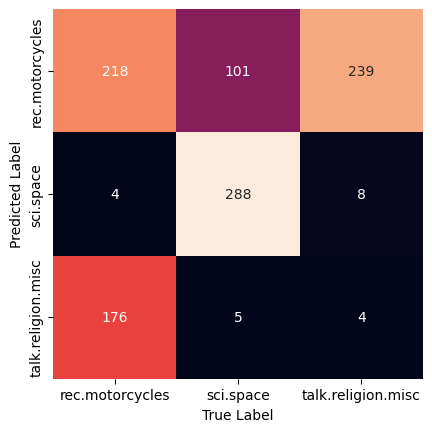

In [140]:
# Create confusion matrix
conf_matrix = confusion_matrix(test.target, [categories.index(label) for label in predicted_labels])

# Plot confusion matrix
sns.heatmap(conf_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=test.target_names, yticklabels=test.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()